# Regresión usando scikit-learn
<br><br><br>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/245px-Scikit_learn_logo_small.svg.png">
<br><br><br>
Usaremos una base de datos de fútbol europeo, la cual tiene más de 25,000 partidos y más de 10,000 jugadores para las temporadas de fútbol profesional europeo de 2008 a 2016.

In [1]:
import sqlite3
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns # Generar graficos mas complejos
from sklearn.metrics import accuracy_score
import numpy as np

<br><br>
#### Creamos una conexión a la base de datos y leemos la tabla "Player_Attributes"

In [6]:
cnx = sqlite3.connect('european_soccer/database.sqlite') # Leer/Conectarnos al archivo sqlite
df = pd.read_sql_query('SELECT * FROM Player_Attributes',cnx) # # Hacer una consulta simple

In [7]:
df.head() # head(): Nos trae las primeras filas

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [13]:
df['overall_rating'].head() # Nos trean los datos de una sola columna

0    67.0
1    67.0
2    62.0
3    61.0
4    61.0
Name: overall_rating, dtype: float64

In [8]:
df.shape # Nos dice el tamanio de la tabla

(183978, 42)

In [9]:
df.columns # Nos devuelkve el nombre de todas las columnas en un arreglo

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

#### De todas las columnas determinaremos cuáles usaremos como "features" para alimentar nuestro modelo

features: Columnas necesarias para entrenar nuestro modelo, son nuestras propiedades

In [10]:
features = [
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

### Seleccionamos un target

In [14]:
target = ['overall_rating']

### Limpiamos el target

In [15]:
df = df.dropna() # Eliminar filas con valores vacios

### Separamos las features en X y el target en Y

In [16]:
X = df[features]
y = df[target]

### Miramos como luce una fila normal

In [17]:
X.iloc[3] #iloc presenta de manera sincilla una fila

potential             65.0
crossing              48.0
finishing             43.0
heading_accuracy      70.0
short_passing         60.0
volleys               43.0
dribbling             50.0
curve                 44.0
free_kick_accuracy    38.0
long_passing          63.0
ball_control          48.0
acceleration          60.0
sprint_speed          64.0
agility               59.0
reactions             46.0
balance               65.0
shot_power            54.0
jumping               58.0
stamina               54.0
strength              76.0
long_shots            34.0
aggression            62.0
interceptions         40.0
positioning           44.0
vision                53.0
penalties             47.0
marking               62.0
standing_tackle       63.0
sliding_tackle        66.0
gk_diving              5.0
gk_handling           10.0
gk_kicking             9.0
gk_positioning         7.0
gk_reflexes            7.0
Name: 3, dtype: float64

In [27]:
X.head()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [19]:
y.head()

,overall_rating
0,67.0
1,67.0
2,62.0
3,61.0
4,61.0


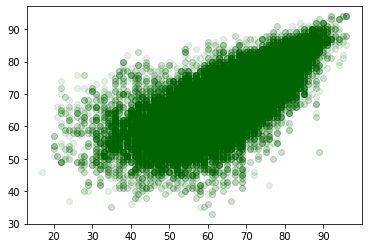

In [23]:
plt.scatter(X['reactions'], y, color='darkgreen', label='Data', alpha=.1)

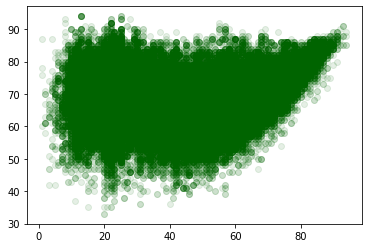

In [31]:
plt.scatter(X['marking'], y, color='darkgreen', label='Data', alpha=.1) # DAtos contaminados

### Separamos los datos en Training y Test DAtasets